# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to<br> another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual <br>churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer<br> retention has now become even more important than customer acquisition.

In any telecom company, 80 % of the revenue is generated by top 20 % of the customer so it is very much imperative to avoid churning of thos customers (Highly Valued Customer).



## Business Goals of the assignments
* Predict the churner
* Find the strongest predictor of the churner.

#### Steps to followed
* Data Cleaning
    - Missing Value detection and imputation
* Data Preparation
    - Derrivation of new features
    - Filtering High Value Customer
    - Tagging Churners (Churn = 1 and Non Churn = 0)
* Modelling
    - Predict the churner using PCA and any modelling techniques. It should be at least 3.
    - Find the strongest predictor using Logistic regression.

In [8]:
import numpy as np
import pandas as pd
import warnings

In [9]:
warnings.filterwarnings('ignore')

In [10]:
# Reading the data and storing it into Data frames
df_telecom_churn = pd.read_csv("telecom_churn_data.csv")

In [11]:
# Checking the shape of the Data
print(df_telecom_churn.shape)

(99999, 226)


In [12]:
# Setting the MAX_COLUMN, MAX_ROWS and MAX_COLWIDTH for better display.
pd.set_option("MAX_COLUMN" ,300)
pd.set_option("MAX_ROW", 300)
pd.set_option("MAX_COLWIDTH", 100)

In [13]:
# Checking the info of the data frame
df_telecom_churn.info(verbose = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [14]:
# Viewing top 5 rows of the data frame
df_telecom_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

###### Finding Highly Valued Customer
* Derive a total recharge in the month of June and July
* Calculate the 70 percentile of the total amount
* Define the HVC, the customer having more than 70 percentile of the data.

In [15]:
# Deriving the new columns Total_Rech_Amount by getting average recharge amount from June and July month
df_telecom_churn['Total_Rech_Amount'] = (df_telecom_churn['total_rech_amt_6'] + df_telecom_churn['total_rech_amt_7'])/2

In [16]:
# Analysing statistical description of the Data Frame
df_telecom_churn.describe(percentiles = [0.25, 0.5, 0.7, 0.75])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
70%     7.001690e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
70%               0.0    324.839400    317.910400    322.134600    305.968400   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
70%       91.090000     87.696000     87.960000     84.162000    191.780000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
70%      187.180000    186.880000    180.892000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
70%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std    

###### Finding Highly valued customer using 70%ile values

In [17]:
percentiles = df_telecom_churn[['Total_Rech_Amount']].quantile([0.7]).values
df_HVC_Telecom = df_telecom_churn[df_telecom_churn['Total_Rech_Amount'] > percentiles[0][0]]

In [18]:
# Shape of the data frame after finding Highly Valued Customer
print(df_HVC_Telecom.shape)

(29979, 227)


###### Finding Missing Values

In [19]:
missingvalue = round(100*(df_HVC_Telecom.isnull().sum()/len(df_HVC_Telecom.index)),2)
missing_value_df = pd.DataFrame({'percent_missing': missingvalue})
missing_value_df.sort_values(by = 'percent_missing', inplace = True, ascending = False)
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 50]
missing_value_df.reset_index()

index  percent_missing
0                  arpu_3g_6            62.02
1            count_rech_3g_6            62.02
2                  fb_user_6            62.02
3                  arpu_2g_6            62.02
4           night_pck_user_6            62.02
5   date_of_last_rech_data_6            62.02
6          total_rech_data_6            62.02
7            max_rech_data_6            62.02
8         av_rech_amt_data_6            62.02
9            count_rech_2g_6            62.02
10                 fb_user_9            61.82
11          night_pck_user_9            61.82
12  date_of_last_rech_data_9            61.82
13         total_rech_data_9            61.82
14           max_rech_data_9            61.82
15           count_rech_2g_9            61.82
16                 arpu_2g_9            61.82
17           count_rech_3g_9            61.82
18                 arpu_3g_9            61.82
19        av_rech_amt_data_9            61.82
20           count_rech_3g_7            61.13
21                 arpu_2g_7            61.13
22  date_of_last_rech_data_7            61.13
23         total_rech_data_7            61.13
24                 fb_user_7            61.13
25        av_rech_amt_data_7            61.13
26           max_rech_data_7            61.13
27                 arpu_3g_7            61.13
28          night_pck_user_7            61.13
29           count_rech_2g_7            61.13
30        av_rech_amt_data_8            60.84
31          night_pck_user_8            60.84
32  date_of_last_rech_data_8            60.84
33                 arpu_2g_8            60.84
34           max_rech_data_8            60.84
35           count_rech_2g_8            60.84
36                 arpu_3g_8            60.84
37         total_rech_data_8            60.84
38                 fb_user_8            60.84
39           count_rech_3g_8            60.84

###### Missing Values Treatment
* The best practice is to drop the column if missing value is more than 25%
* Dropping all the columns having more than 50% of the missing values.

In [20]:
# Shape of the HVC Data frame before missing value treatment
print(df_HVC_Telecom.shape)

(29979, 227)


In [21]:
df_HVC_Telecom.drop(['arpu_3g_6','night_pck_user_6','arpu_2g_6','fb_user_6',
                       'date_of_last_rech_data_6','count_rech_2g_6',
                       'count_rech_3g_6','date_of_last_rech_data_7','total_rech_data_7','fb_user_7',
                       'max_rech_data_7','night_pck_user_7','count_rech_2g_7','av_rech_amt_data_7',
                       'arpu_2g_7','count_rech_3g_7','arpu_3g_7','total_rech_data_9','count_rech_3g_9',
                       'fb_user_9','max_rech_data_9','arpu_3g_9','date_of_last_rech_data_9','night_pck_user_9',
                       'arpu_2g_9','count_rech_2g_9','av_rech_amt_data_9','total_rech_data_8',
                       'arpu_3g_8','fb_user_8','night_pck_user_8','av_rech_amt_data_8','max_rech_data_8',
                       'count_rech_3g_8','arpu_2g_8','count_rech_2g_8','date_of_last_rech_data_8',
                       'total_rech_data_6', 'av_rech_amt_data_6', 'max_rech_data_6'], axis = 1,inplace = True)

In [22]:
# Shape of the HVC Data frame after missing value treatment
print(df_HVC_Telecom.shape)

(29979, 187)


In [23]:
missingvalue = round(100*(df_HVC_Telecom.isnull().sum()/len(df_HVC_Telecom.index)),2)
missing_value_df = pd.DataFrame({'percent_missing': missingvalue})
missing_value_df.sort_values(by = 'percent_missing', inplace = True, ascending = False)
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 0]
missing_value_df.reset_index()

index  percent_missing
0            std_og_mou_9             5.68
1        std_og_t2m_mou_9             5.68
2        loc_og_t2c_mou_9             5.68
3        loc_og_t2m_mou_9             5.68
4        std_ic_t2m_mou_9             5.68
5        std_ic_t2o_mou_9             5.68
6        std_ic_t2t_mou_9             5.68
7        loc_og_t2t_mou_9             5.68
8            std_ic_mou_9             5.68
9            loc_og_mou_9             5.68
10          roam_og_mou_9             5.68
11          roam_ic_mou_9             5.68
12       std_og_t2t_mou_9             5.68
13       loc_ic_t2t_mou_9             5.68
14           spl_og_mou_9             5.68
15            og_others_9             5.68
16           offnet_mou_9             5.68
17           isd_ic_mou_9             5.68
18       std_ic_t2f_mou_9             5.68
19            ic_others_9             5.68
20           isd_og_mou_9             5.68
21       loc_ic_t2f_mou_9             5.68
22       std_og_t2c_mou_9             5.68
23            onnet_mou_9             5.68
24       loc_og_t2f_mou_9             5.68
25           loc_ic_mou_9             5.68
26       std_og_t2f_mou_9             5.68
27       loc_ic_t2m_mou_9             5.68
28           spl_ic_mou_9             5.68
29       std_og_t2t_mou_8             3.13
30       std_ic_t2o_mou_8             3.13
31           loc_ic_mou_8             3.13
32       std_og_t2c_mou_8             3.13
33           loc_og_mou_8             3.13
34       std_og_t2f_mou_8             3.13
35       std_og_t2m_mou_8             3.13
36       std_ic_t2f_mou_8             3.13
37           std_og_mou_8             3.13
38       loc_og_t2c_mou_8             3.13
39            og_others_8             3.13
40           spl_og_mou_8             3.13
41           std_ic_mou_8             3.13
42       loc_og_t2f_mou_8             3.13
43          roam_ic_mou_8             3.13
44            ic_others_8             3.13
45       loc_ic_t2f_mou_8             3.13
46           isd_ic_mou_8             3.13
47            onnet_mou_8             3.13
48       loc_ic_t2m_mou_8             3.13
49           spl_ic_mou_8             3.13
50       std_ic_t2m_mou_8             3.13
51           offnet_mou_8             3.13
52       loc_ic_t2t_mou_8             3.13
53           isd_og_mou_8             3.13
54       std_ic_t2t_mou_8             3.13
55          roam_og_mou_8             3.13
56       loc_og_t2t_mou_8             3.13
57       loc_og_t2m_mou_8             3.13
58    date_of_last_rech_9             2.89
59    date_of_last_rech_8             1.98
60   last_date_of_month_9             1.20
61       std_ic_t2m_mou_6             1.05
62       std_ic_t2t_mou_6             1.05
63           spl_og_mou_6             1.05
64            og_others_6             1.05
65       std_ic_t2f_mou_6             1.05
66       loc_ic_t2t_mou_6             1.05
67       loc_ic_t2m_mou_6             1.05
68       loc_ic_t2f_mou_6             1.05
69       std_og_t2t_mou_6             1.05
70       loc_og_t2m_mou_6             1.05
71       loc_og_t2f_mou_6             1.05
72            ic_others_6             1.05
73           isd_ic_mou_6             1.05
74            onnet_mou_6             1.05
75           offnet_mou_6             1.05
76          roam_ic_mou_6             1.05
77          roam_og_mou_6             1.05
78           spl_ic_mou_6             1.05
79       loc_og_t2t_mou_6             1.05
80           isd_og_mou_6             1.05
81           loc_ic_mou_6             1.05
82       loc_og_t2c_mou_6             1.05
83           std_ic_mou_6             1.05
84           loc_og_mou_6             1.05
85       std_og_t2m_mou_6             1.05
86       std_og_t2f_mou_6             1.05
87       std_ic_t2o_mou_6             1.05
88       std_og_t2c_mou_6             1.05
89           std_og_mou_6             1.05
90       std_ic_t2m_mou_7             1.01
91           std_ic_mou_7             1.01
92           spl_ic_m

In [24]:
df_HVC_Telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

In [25]:
# Separating numerical columns and categorical columns
numeric_col = df_HVC_Telecom.select_dtypes(include=[np.float64, np.int64]).columns.to_list()

# Separating numerical columns and categorical columns
categorical_col = df_HVC_Telecom.select_dtypes(include=[np.object]).columns.to_list()

In [26]:
# Imputing Missing Values with mean for all the numerical variable
for col in numeric_col:
    df_HVC_Telecom[col].fillna(df_HVC_Telecom[col].mean(), inplace = True)

In [27]:
# Imputing Missing Values with mode for all the categorical variable
for col in categorical_col:
    df_HVC_Telecom[col].fillna(df_HVC_Telecom[col].mode()[0], inplace = True)

In [28]:
missingvalue = round(100*(df_HVC_Telecom.isnull().sum()/len(df_HVC_Telecom.index)),2)
missing_value_df = pd.DataFrame({'percent_missing': missingvalue})
missing_value_df.sort_values(by = 'percent_missing', inplace = True, ascending = False)
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 0]
missing_value_df.reset_index()

Empty DataFrame
Columns: [index, percent_missing]
Index: []

In [29]:
df_HVC_Telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29   255.436275        453.43        567.16   
8        351.03        35.08    33.460000         94.66         80.63   
13       108.39       534.24   244.810000        413.31        119.28   
16        74.01        70.61    31.340000        296.29        229.74   
17         9.28         7.79   558.510000         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91    357.585455          16.23          33.49          31.64   
8         136.48    108.710000           0.00           0.00           0.00   
13        482.46    214.060000          23.53         144.24          72.11   
16        162.76    224.390000           0.00           2.83           0.00   
17          5.54     87.890000           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7       12.093686          23.74          12.59          38.06      18.287734   
8        0.000000           0.00           0.00           0.00       0.000000   
13     136.780000           7.98          35.26           1.44      12.780000   
16       0.000000           0.00          17.74           0.00       0.000000   
17       0.000000           0.00           8.46          13.34      17.980000   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28         85.652436   
8             297.13            217.59             12.49         26.130000   
13             49.63              6.19             36.01          6.140000   
16             42.61             65.16             67.38         26.880000   
17             38.99              0.00              0.00         36.410000   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28        167.025693   
8              80.96             70.58             50.54         34.580000   
13            151.13             47.28            294.46        108.240000   
16            273.29            145.99            128.28        201.490000   
17             58.54              0.00              0.00          9.380000   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23          6.686041   
8               0.00              0.00              0.00          0.000000   
13              4.54              0.00             23.51    

In [30]:
df_HVC_Telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.997900e+04    29979.0         29979.0         29979.0   
mean    7.001223e+09      109.0             0.0             0.0   
std     6.846594e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000641e+09      109.0             0.0             0.0   
50%     7.001232e+09      109.0             0.0             0.0   
75%     7.001814e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         29979.0  29979.000000  29979.000000  29979.000000  29979.000000   
mean              0.0    587.587624    589.424681    535.067748    488.869400   
std               0.0    442.848876    463.049067    492.447887    496.672348   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0    364.352500    365.235000    289.782000    239.315500   
50%               0.0    495.951000    493.781000    452.232000    413.331000   
75%               0.0    704.184500    700.986000    671.349500    635.834000   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     299.392147    307.701888    276.459159    255.436275    422.582059   
std      459.925996    480.983071    464.261914    439.055121    468.790909   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.590000     43.370000     34.060000     29.060000    142.860000   
50%      131.230000    130.690000    113.290000    107.210000    289.640000   
75%      353.500000    360.360000    298.215000    260.990000    523.625000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29979.000000  29979.000000  29979.000000   29979.000000   29979.000000   
mean     428.433657    387.277278    357.585455      17.613734      13.673468   
std      484.819738    472.874301    436.978885      79.172394      76.330969   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      141.280000    111.780000     96.375000       0.000000       0.000000   
50%      289.140000    262.030000    245.580000       0.000000       0.000000   
75%      532.905000    483.000000    434.725000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.691460      12.093686      29.661010      22.281627   
std        74.550007      68.331120     118.591216      97.949450   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29979.000000   29979.000000      29979.000000      29979.000000   
mean       22.177442      18.287734         95.742759         96.765436   
std       106.224762      90.143526        236.759111        248.061387   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.990000          9.770000   
50%         0.000000       0.000000         34.030000         34.740000   
75%         0.000000       0.000000         95.742759         95.590000   
max      

In [31]:
col_with_std_zero = [col for col in numeric_col if df_HVC_Telecom[col].std() == 0]

###### Dropping all the columns having std zero as this will not impact anything on modelling.

In [32]:
df_HVC_Telecom.drop(col_with_std_zero, inplace = True, axis = 1)

In [33]:
print(df_HVC_Telecom.shape)

(29979, 175)


##### Outlier treatments
* The most of the numerical columns seems to have outliers.
* Based on the above statistical distribution of the data there are huge gap between 99.8%, 99.9% and maximum.
* Caping all the numerical variables with 99.8% of the column data

In [34]:
df_HVC_Telecom.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.5,0.75,0.96,0.97,0.98,0.99,0.995,0.997,0.998])

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   2.997900e+04  29979.000000  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09    587.587624    589.424681    535.067748    488.869400   
std     6.846594e+05    442.848876    463.049067    492.447887    496.672348   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
1%      7.000028e+09     18.221200     25.600600      0.000000      0.000000   
2%      7.000053e+09     94.450800    104.028480      0.000000      0.000000   
3%      7.000082e+09    142.713780    158.452040      0.000000      0.000000   
4%      7.000110e+09    178.008280    190.499720      4.000000      0.000000   
5%      7.000138e+09    202.181000    212.824700     22.221200      0.000000   
50%     7.001232e+09    495.951000    493.781000    452.232000    413.331000   
75%     7.001814e+09    704.184500    700.986000    671.349500    635.834000   
96%     7.002313e+09   1332.380160   1352.633920   1355.708760   1299.731200   
97%     7.002339e+09   1459.650580   1472.936560   1478.792440   1414.707200   
98%     7.002363e+09   1627.651960   1644.486320   1662.431840   1603.620320   
99%     7.002387e+09   1983.590100   1999.509680   1988.082260   1958.789320   
99.5%   7.002399e+09   2416.515880   2387.306330   2411.783590   2339.872210   
99.7%   7.002404e+09   2808.045964   2812.401018   2903.281382   2693.065104   
99.8%   7.002406e+09   3122.436696   3212.620088   3195.290672   3066.964056   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     299.392147    307.701888    276.459159    255.436275    422.582059   
std      459.925996    480.983071    464.261914    439.055121    468.790909   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      1.057800   
2%         0.000000      0.000000      0.000000      0.000000      7.554800   
3%         0.986800      1.093400      0.000000      0.000000     14.570400   
4%         2.462400      2.340000      0.330000      0.000000     20.890000   
5%         3.860000      3.749000      1.010000      0.000000     28.180000   
50%      131.230000    130.690000    113.290000    107.210000    289.640000   
75%      353.500000    360.360000    298.215000    260.990000    523.625000   
96%     1283.265600   1344.942400   1257.057600   1144.224000   1406.298000   
97%     1444.884200   1497.545000   1441.682400   1313.578200   1579.113800   
98%     1695.346000   1773.174800   1700.436000   1572.455200   1838.334000   
99%     2166.876000   2220.577600   2189.445800   2124.967800   2328.192600   
99.5%   2733.400500   2782.695300   2764.611700   2643.174000   2747.450000   
99.7%   3216.282580   3221.788580   3192.914700   3063.971560   3276.341360   
99.8%   3426.598280   3645.572520   3562.896800   3519.739840   3592.317080   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29979.000000  29979.000000  29979.000000   29979.000000   29979.000000   
mean     428.433657    387.277278    357.585455      17.613734      13.673468   
std      484.819738    472.874301    436.978885      79.172394      76.330969   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
1%         1.099000      0.000000      0.000000       0.000000       0.000000   
2%         8.121200      0.400000      0.000000       0.000000       0.000000   
3%        14.727000      2.536800      0.050000       0.000000       0.000000   
4%        22.062400      5.960000      1.182400       0.000000       0.000000   
5%        28.758000     10.310000      3.290000       0.000000       0.000000   
50%      289.14

In [35]:
# Separating numerical columns and categorical columns
numeric_col = df_HVC_Telecom.select_dtypes(include=[np.float64, np.int64]).columns.to_list()

# Separating numerical columns and categorical columns
categorical_col = df_HVC_Telecom.select_dtypes(include=[np.object]).columns.to_list()

In [36]:
# This cell will throw an error if run twice
numeric_col.remove('mobile_number')

In [37]:
for col in numeric_col:
    percentiles = df_HVC_Telecom[col].quantile([0.998]).values
    df_HVC_Telecom[col][df_HVC_Telecom[col] >= percentiles[0]] = percentiles[0]

In [38]:
# This cell will add the column again if run twice
numeric_col.insert(0,'mobile_number')

In [39]:
df_HVC_Telecom.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.5,0.75,0.96,0.97,0.98,0.99,0.995,0.997,0.998])

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   2.997900e+04  29979.000000  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09    583.145541    584.785088    530.120019    484.006944   
std     6.846594e+05    365.369252    368.178764    398.535106    397.891717   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
1%      7.000028e+09     18.221200     25.600600      0.000000      0.000000   
2%      7.000053e+09     94.450800    104.028480      0.000000      0.000000   
3%      7.000082e+09    142.713780    158.452040      0.000000      0.000000   
4%      7.000110e+09    178.008280    190.499720      4.000000      0.000000   
5%      7.000138e+09    202.181000    212.824700     22.221200      0.000000   
50%     7.001232e+09    495.951000    493.781000    452.232000    413.331000   
75%     7.001814e+09    704.184500    700.986000    671.349500    635.834000   
96%     7.002313e+09   1332.380160   1352.633920   1355.708760   1299.731200   
97%     7.002339e+09   1459.650580   1472.936560   1478.792440   1414.707200   
98%     7.002363e+09   1627.651960   1644.486320   1662.431840   1603.620320   
99%     7.002387e+09   1983.590100   1999.509680   1988.082260   1958.789320   
99.5%   7.002399e+09   2416.515880   2387.306330   2411.783590   2339.872210   
99.7%   7.002404e+09   2808.045964   2812.401018   2903.281382   2693.065104   
99.8%   7.002406e+09   3120.897827   3211.400148   3194.069218   3066.510858   
max     7.002411e+09   3122.436696   3212.620088   3195.290672   3066.964056   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     297.309906    305.196089    273.899338    252.911326    420.744098   
std      440.830778    456.885976    436.763026    411.339721    452.422747   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      1.057800   
2%         0.000000      0.000000      0.000000      0.000000      7.554800   
3%         0.986800      1.093400      0.000000      0.000000     14.570400   
4%         2.462400      2.340000      0.330000      0.000000     20.890000   
5%         3.860000      3.749000      1.010000      0.000000     28.180000   
50%      131.230000    130.690000    113.290000    107.210000    289.640000   
75%      353.500000    360.360000    298.215000    260.990000    523.625000   
96%     1283.265600   1344.942400   1257.057600   1144.224000   1406.298000   
97%     1444.884200   1497.545000   1441.682400   1313.578200   1579.113800   
98%     1695.346000   1773.174800   1700.436000   1572.455200   1838.334000   
99%     2166.876000   2220.577600   2189.445800   2124.967800   2328.192600   
99.5%   2733.400500   2782.695300   2764.611700   2643.174000   2747.450000   
99.7%   3216.282580   3221.788580   3192.914700   3063.971560   3276.341360   
99.8%   3425.299764   3644.843551   3562.593939   3519.682633   3591.956592   
max     3426.598280   3645.572520   3562.896800   3519.739840   3592.317080   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29979.000000  29979.000000  29979.000000   29979.000000   29979.000000   
mean     426.410984    384.535456    355.762142      16.809093      12.719507   
std      465.784933    441.320338    419.179206      66.080267      57.905571   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
1%         1.099000      0.000000      0.000000       0.000000       0.000000   
2%         8.121200      0.400000      0.000000       0.000000       0.000000   
3%        14.727000      2.536800      0.050000       0.000000       0.000000   
4%        22.062400      5.960000      1.182400       0.000000       0.000000   
5%        28.758000     10.310000      3.290000       0.000000       0.000000   
50%      289.14

* Revenue of any bussines can not be negative.
* Capping the negative revenue with Zero

In [40]:
for col in ['arpu_6','arpu_7','arpu_8','arpu_9']:
    df_HVC_Telecom[df_HVC_Telecom[col] < 0] = 0

In [41]:
df_HVC_Telecom.shape

(29979, 175)

In [42]:
df_HVC_Telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
7                0.00            0.00         0.00         0.00
8               34.91          142.18         0.00         0.00
13             631.86          446.09         0.00         0.00
16             334.56          255.74         0.00         0.00
17              87.13          631.08         0.00         0.00
21             252.61         1031.53         0.00         0.00
24             330.03          627.78         0.00         0.00
33             114.16            1.70        30.92      5588.11
38             114.09          708.04         0.00         0.00
41             165.84           89.13         0.00         0.00
48             894.81         2319.01         0.00         0.00
53             680.61          503.06         0.82         0.00
56             225.34          127.48       137.12       835.99
57            1047.41          326.29        22.05      4305.54
60             233.49          243.91         0.00         0.00
61             376.68          259.98        71.91         0.00
69             134.43          540.46         0.00         0.00
73             270.26         1609.36         0.00         0.00
74             119.03          686.28         0.00         0.00
77              53.38           67.24         0.00         0.00
87             603.29          673.81       117.50         0.00
92             315.49          515.68       712.87         0.00
96             156.14         1091.23         0.00         0.00
97               0.00            0.00         0.00         0.00
101            123.71          203.81       687.85         0.58
102            166.71          288.38         0.00         0.00
103           1389.76         1487.34         0.00         0.00
105            254.98          498.94         0.00       892.97
111              0.00            0.00         0.00         0.00
115           1465.81         1074.09         0.00         0.00
122              0.18          315.74         0.00         0.00
124             79.38          268.78        87.34         0.00
131            312.19          591.19         0.00         0.00
133            428.63         1252.48        14.59       135.70
134             99.56           91.53        83.52       807.91
143              0.00            0.00         0.00         0.00
146            150.43         1918.91         0.00         0.00
147            226.34          289.44        70.91       718.40
149            425.48          262.76        37.00       692.63
154            777.66         1742.94         0.00         0.00
157            142.18          464.86         4.26      2140.10
158           1032.21         1758.93        13.05       728.02
165             99.43          163.66         0.00         0.00
170            363.56          562.14       845.67       447.04
171             41.38          434.83         0.00         0.00
173            129.58         2485.86         0.00         0.00
175            545.44          369.18         0.00         0.00
176            104.53            0.00       548.29       176.26
177             76.74           64.21         1.78      1761.57
184            330.01          284.86         0.00         0.00
185            337.46          198.29         1.41       599.90
188              0.00            0.00         0.00         0.00
191             18.89            0.00         0.00        51.12
195            599.03          522.18         0.00         0.00
199              0.00            0.00         0.00         0.00
203             93.13          476.48         0.00         0.00
204            189.51         1078.26        67.21      1409.21
206            504.38          319.34       725.73         0.00
208           1035.16          871.93         1.00       551.12
213            539.58          780.48         0.05      1322.62
218            243.79         1449.66       110.47       393.43
223             14.86          582.48  

In [43]:
df_HVC_Telecom['ActualChurnPredicter'] = df_HVC_Telecom['total_ic_mou_9'] + df_HVC_Telecom['total_og_mou_9'] + df_HVC_Telecom['vol_2g_mb_9'] + df_HVC_Telecom['vol_3g_mb_9']

In [44]:
df_HVC_Telecom['Churner'] = df_HVC_Telecom['ActualChurnPredicter'].map(lambda x: 1 if x == 0 else 0)

In [45]:
df_HVC_Telecom['Churner'].value_counts()

0    27278
1     2701
Name: Churner, dtype: int64

###### Printing churn %age

In [46]:
churn_percentage = round((2701/27278)*100,2)
print(churn_percentage)

9.9


Since Month 9 is churn phase so it should not be a part of modelling and hence dropping all month 9 related data.

In [47]:
df_HVC_Telecom.columns.to_list()

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2

In [48]:
df_HVC_Telecom.drop(['last_date_of_month_9', 'arpu_9',
                     'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
                     'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
                     'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
                     'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
                     'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
                     'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
                     'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
                     'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
                     'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
                     'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
                     'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
                     'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9',
                     'monthly_3g_9', 'sachet_3g_9','ActualChurnPredicter'], axis = 1, inplace = True)

In [49]:
print(df_HVC_Telecom.shape)

(29979, 134)


In [50]:
df_HVC_Telecom.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
7      7000701601            6/30/2014            7/31/2014   
8      7001524846            6/30/2014            7/31/2014   
13     7002191713            6/30/2014            7/31/2014   
16     7000875565            6/30/2014            7/31/2014   
17     7000187447            6/30/2014            7/31/2014   

   last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7             8/31/2014  1069.180  1349.850  3171.480        57.84   
8             8/31/2014   378.721   492.223   137.362       413.69   
13            8/31/2014   492.846   205.671   593.260       501.76   
16            8/31/2014   430.975   299.869   187.894        50.51   
17            8/31/2014   690.008    18.980    25.499      1185.91   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
13       108.39       534.24        413.31        119.28        482.46   
16        74.01        70.61        296.29        229.74        162.76   
17         9.28         7.79         61.64          0.00          5.54   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11           7.98          35.26   
16           0.00           2.83           0.00           0.00          17.74   
17           0.00           4.76           4.81           0.00           8.46   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
13           1.44             49.63              6.19             36.01   
16           0.00             42.61             65.16             67.38   
17          13.34             38.99              0.00              0.00   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
13            151.13             47.28            294.46              4.54   
16            273.29            145.99            128.28              0.00   
17             58.54              0.00              0.00              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7              55.14             53.23               0.0               0.0   
8               0.00              0.00               0.0               0.0   
13              0.00             23.51               0.0               0.0   
16              4.48             10.26               0.0               0.0   
17              0.00              0.00               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
13              0.49        205.31         53.48        353.99   
16              0.00        315.91        215.64        205.93   
17              0.00         97.54          0.00          0.00   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
13            446.41             85.98            498.23            255.36   
16              7.89              2.58              3.23             22.99   
17           1146.91              0.81              0.00              1.55   

    std_og_t2m_mo

In [51]:
for col in ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']:
    print(col, df_HVC_Telecom[col].nunique())

last_date_of_month_6 2
last_date_of_month_7 2
last_date_of_month_8 2


In [52]:
print(df_HVC_Telecom['last_date_of_month_6'].value_counts())
print(df_HVC_Telecom['last_date_of_month_7'].value_counts())
print(df_HVC_Telecom['last_date_of_month_8'].value_counts())

6/30/2014    29708
0              271
Name: last_date_of_month_6, dtype: int64
7/31/2014    29708
0              271
Name: last_date_of_month_7, dtype: int64
8/31/2014    29708
0              271
Name: last_date_of_month_8, dtype: int64


All the date fields are just having two uniques value and hence it can be dropped before modelling.

In [53]:
df_HVC_Telecom.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',], axis = 1, inplace = True)

Also dropping all the dates field as it has no significance for modelling

In [54]:
df_HVC_Telecom.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis = 1, inplace = True)

In [55]:
print(df_HVC_Telecom.shape)

(29979, 128)


# Modelling

<h1><Center>Model 1 Starts from here<h1><Center>

In [56]:
# Copying the data frame for Logistic Regression for finding the best predictor for the churn
df_Tel_LR = df_HVC_Telecom.copy()

# Copying the data frame for Logistic Regression after PCA
df_Tel_PCA_LR = df_HVC_Telecom.copy()

# Copying the data frame for Random Forest after PCA
df_Tel_PCA_RF = df_HVC_Telecom.copy()

In [57]:
df_Tel_LR.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

In [58]:
print(df_Tel_LR.shape)

(29979, 128)


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# sns.pairplot(df_Tel_LR)
# plt.show()

### Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Putting feature variable to X
X = df_Tel_LR.drop(['Churner','mobile_number'], axis=1)

X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [63]:
# Putting response variable to y
y = df_Tel_LR['Churner']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churner, dtype: int64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scalling using Standard Scaler

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# Using standard scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

C:\instlledsftware\anacnda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\instlledsftware\anacnda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [67]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -1.591025  0.194202  1.148655     0.006155    -0.551539    -0.504159   
1 -0.646902 -0.178126 -0.928123    -0.566501    -0.584698    -0.587024   
2  0.877785 -0.227553 -0.027556    -0.483694    -0.609392    -0.599133   
3 -0.371325  0.285787  1.241681    -0.206924    -0.454837    -0.491498   
4 -0.293734 -0.737084 -0.194427    -0.662124    -0.637679    -0.550008   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      0.015022      1.941881      4.366952       0.011696      -0.220395   
1     -0.719689     -0.703231     -0.650797      -0.257738      -0.220395   
2      0.082280      0.116307     -0.368582      -0.257738      -0.220395   
3     -0.358723      1.800659      4.704640      -0.257738      -0.220395   
4      1.605932      0.625136      1.570479      -0.241982      -0.220395   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.227334       0.008025      -0.244662      -0.237823   
1      -0.227334      -0.276720      -0.244662      -0.237823   
2      -0.227334      -0.276720      -0.244662      -0.237823   
3      -0.227334      -0.276720      -0.244662      -0.237823   
4      -0.227334      -0.258960      -0.244662      -0.237823   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          0.005991         -0.258778         -0.256341          0.013580   
1         -0.289192         -0.273376         -0.372070         -0.379832   
2         -0.055178         -0.314906         -0.386243          0.923898   
3          0.134285         -0.213505         -0.235999          0.162457   
4         -0.415931         -0.424069         -0.439315         -0.722291   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.717392         -0.599971          0.021982         -0.384555   
1         -0.388904         -0.356120         -0.108524         -0.071083   
2          1.044044          0.153857          1.423839          1.597561   
3         -0.218714         -0.510871         -0.263866         -0.384555   
4         -0.701348         -0.687312         -0.379377         -0.384555   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.386549          0.019372          0.564373         -0.258731   
1         -0.243226         -0.290183         -0.291450         -0.304758   
2          0.214072         -0.290183         -0.291450         -0.304758   
3         -0.369544         -0.290183         -0.270055         -0.304758   
4         -0.386549         -0.290183         -0.291450         -0.304758   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      0.010431     -0.645023     -0.565538          0.007707   
1     -0.431164     -0.426102     -0.465627         -0.447377   
2      0.639196      0.557465     -0.116753         -0.483747   
3      0.171206     -0.295206     -0.494401         -0.275309   
4     -0.745150     -0.735704     -0.729154         -0.485237   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.458056         -0.413255          0.011089          2.644021   
1         -0.487703         -0.447903         -0.516115         -0.513385   
2         -0.493223         -0.454345         -0.516115         -0.505867   
3         -0.372988         -0.409326         -0.430094          2.215435   
4         -0.466274         -0.371300          2.363331          1.167427   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0          5.484409          0.024607         -0.190712         -0.193063   
1         -0.477685         -0.201661         -0.190712         -0.193063   
2         -0.478235         -0.201661         -0.190712         -0.193063   
3          5.822976         -0.201661         -0.190712         -0.193063   
4          2.301724         -0.201661         -0.190712         -0.193063   



##### Looking at Correlations

In [68]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Creating Heat map for finding multi colinearity however due to huge number of features, it is not clear though

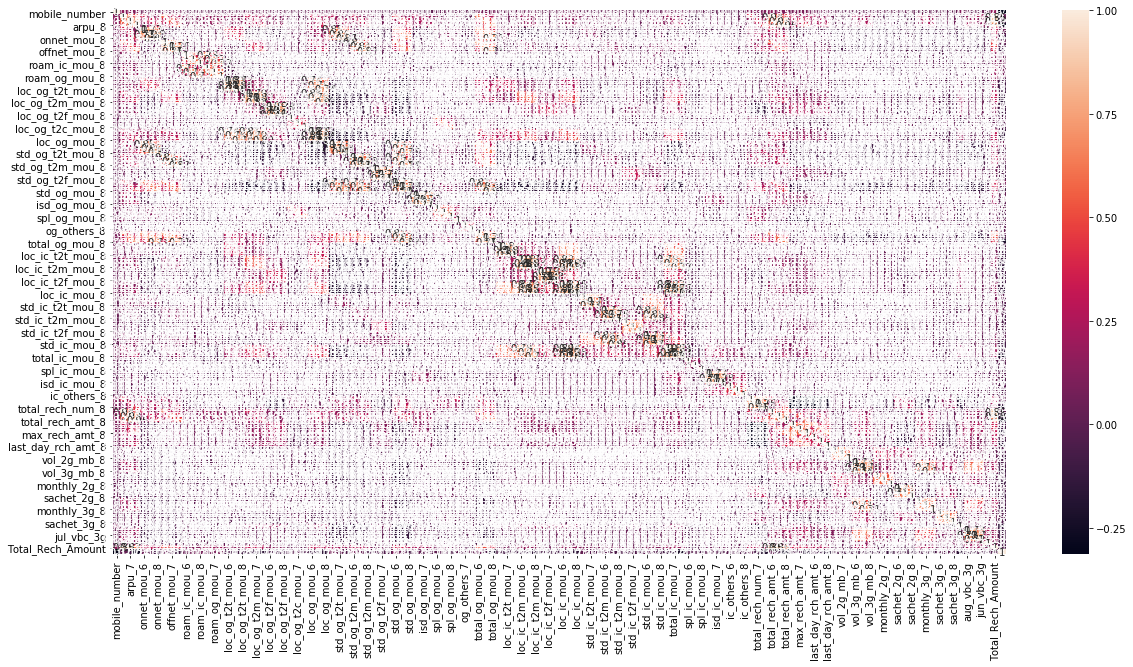

In [69]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_Tel_LR.corr(),annot = True)
plt.show()

In [70]:
df_Tel_LR.corr()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
mobile_number            1.000000  0.151061  0.150697  0.126692     0.064028   
arpu_6                   0.151061  1.000000  0.556140  0.467742     0.352931   
arpu_7                   0.150697  0.556140  1.000000  0.679353     0.188276   
arpu_8                   0.126692  0.467742  0.679353  1.000000     0.118161   
onnet_mou_6              0.064028  0.352931  0.188276  0.118161     1.000000   
onnet_mou_7              0.063446  0.187170  0.342494  0.231064     0.728911   
onnet_mou_8              0.059582  0.158702  0.275980  0.376243     0.600866   
offnet_mou_6             0.088452  0.528318  0.323498  0.233244     0.003817   
offnet_mou_7             0.087015  0.299143  0.514259  0.363103    -0.052028   
offnet_mou_8             0.082805  0.258848  0.398726  0.548996    -0.039343   
roam_ic_mou_6            0.024234  0.132960  0.100803  0.099623     0.004050   
roam_ic_mou_7            0.020863  0.095125  0.115516  0.085465     0.019250   
roam_ic_mou_8            0.021846  0.109400  0.119886  0.125014     0.037395   
roam_og_mou_6            0.026054  0.195282  0.135831  0.135001     0.048442   
roam_og_mou_7            0.023227  0.141936  0.187668  0.136749     0.057715   
roam_og_mou_8            0.022855  0.141596  0.168892  0.201346     0.062219   
loc_og_t2t_mou_6         0.042325  0.167869  0.096997  0.091677     0.428782   
loc_og_t2t_mou_7         0.042214  0.124882  0.166011  0.136322     0.332057   
loc_og_t2t_mou_8         0.043337  0.121309  0.141252  0.198534     0.289920   
loc_og_t2m_mou_6         0.072847  0.344355  0.204677  0.202881    -0.048148   
loc_og_t2m_mou_7         0.075725  0.239332  0.311230  0.271793    -0.079075   
loc_og_t2m_mou_8         0.073578  0.220964  0.252499  0.374857    -0.075362   
loc_og_t2f_mou_6         0.036201  0.143984  0.112212  0.130311    -0.073498   
loc_og_t2f_mou_7         0.036897  0.110028  0.144441  0.143380    -0.083515   
loc_og_t2f_mou_8         0.036904  0.105657  0.118935  0.169722    -0.078513   
loc_og_t2c_mou_6         0.027719  0.070616  0.020324  0.007845     0.058106   
loc_og_t2c_mou_7         0.027889  0.012569  0.068242  0.026429     0.033975   
loc_og_t2c_mou_8         0.028788  0.015378  0.042594  0.077122     0.044956   
loc_og_mou_6             0.075308  0.339936  0.202753  0.198038     0.221348   
loc_og_mou_7             0.076865  0.241748  0.319110  0.272239     0.150507   
loc_og_mou_8             0.075652  0.224447  0.259760  0.376787     0.117055   
std_og_t2t_mou_6         0.046123  0.279249  0.142225  0.067179     0.851627   
std_og_t2t_mou_7         0.046793  0.127103  0.272486  0.170503     0.611253   
std_og_t2t_mou_8         0.043177  0.100710  0.217745  0.296982     0.497671   
std_og_t2m_mou_6         0.048868  0.318008  0.192674  0.092631     0.038316   
std_og_t2m_mou_7         0.048747  0.154964  0.335874  0.204709    -0.008500   
std_og_t2m_mou_8         0.045690  0.122518  0.255201  0.341892     0.001064   
std_og_t2f_mou_6         0.019343  0.066639  0.049149  0.054475    -0.050231   
std_og_t2f_mou_7         0.018405  0.049808  0.074295  0.066423    -0.051181   
std_og_t2f_mou_8         0.018663  0.043442  0.052916  0.075917    -0.048609   
std_og_mou_6             0.063914  0.410287  0.232280  0.111974     0.599399   
std_og_mou_7             0.064320  0.196891  0.419269  0.258107     0.402230   
std_og_mou_8             0.058683  0.152283  0.320108  0.433172     0.332815   
isd_og_mou_6             0.011340  0.258138  0.167182  0.161666    -0.043321   
isd_og_mou_7             0.011605  0.174981  0.255048  0.190775    -0.044227   
isd_og_mou_8             0.010545  0.172966  0.196146  0.257859    -0.035731   
spl_og_mou_6             0.038529  0.130713  0.052690  0.025689     0.097689   
spl_og_mou_7             0.040062  0.051268  0.119503  0.056692     0.074208   
spl_og_mou_8             0.038270  0.043094  0.084903  0.121369     0.068221   
og_others_6         

### Model Building

In [71]:
import statsmodels.api as sm

In [72]:
y_train = y_train.to_list()

In [73]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20858
Model Family:                Binomial   Df Model:                          126
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3678.3
Date:                Mon, 16 Mar 2020   Deviance:                       7356.7
Time:                        19:36:32   Pearson chi2:                 3.72e+05
No. Iterations:                    10   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3422      0.084    -51.649      0.000      -4.507      -4.177
arpu_6                 0.1113      0.117      0.953      0.341      -0.118       0.340
arpu_7                 0.3776      0.129      2.937      0.003       0.126       0.630
arpu_8                 0.4558      0.159      2.873      0.004       0.145       0.767
onnet_mou_6           -0.1421      0.440     -0.323      0.747      -1.005       0.721
onnet_mou_7            0.8046      0.490      1.642      0.101      -0.156       1.765
onnet_mou_8            0.2458      0.336      0.731      0.465      -0.414       0.905
offnet_mou_6           0.1151      0.376      0.306      0.759      -0.621       0.852
offnet_mou_7           0.6291      0.538      1.170      0.242      -0.425       1.683
offnet_mou_8          -0.1631      0.387     -0.422      0.673      -0.921       0.595
roam_ic_mou_6          0.0534      0.045      1.184      0.237      -0.035       0.142
roam_ic_mou_7          0.1080      0.044      2.466      0.014       0.022       0.194
roam_ic_mou_8         -0.0381      0.039     -0.981      0.326      -0.114       0.038
roam_og_mou_6          0.0258      0.105      0.247      0.805      -0.179       0.231
roam_og_mou_7         -0.0627      0.106     -0.590      0.555      -0.271       0.146
roam_og_mou_8          0.0469      0.081      0.578      0.563      -0.112       0.206
loc_og_t2t_mou_6       0.6693      0.476      1.406      0.160      -0.264       1.603
loc_og_t2t_mou_7      -1.2548      0.442     -2.838      0.005      -2.121      -0.388
loc_og_t2t_mou_8      -1.0294      0.575     -1.790      0.074      -2.157       0.098
loc_og_t2m_mou_6       0.3556      0.492      0.723      0.470      -0.608       1.320
loc_og_t2m_mou_7      -1.3003      0.419     -3.102      0.002      -2.122      -0.479
loc_og_t2m_mou_8      -0.9156      0.639     -1.432      0.152      -2.168       0.337
loc_og_t2f_mou_6      -0.0221      0.091     -0.244      0.808      -0.200       0.155
loc_og_t2f_mou_7      -0.0633      0.091     -0.694      0.488      -0.242       0.116
loc_og_t2f_mou_8      -0.0481      0.105     -0.458      0.647      -0.254       0.158
loc_og_t2c_mou_6      -0.0928      0.043     -2.150      0.032      -0.177      -0.008
loc_og_t2c_mou_7       0.0442      0.044      1.012      0.312      -0.041       0.130
loc_og_t2c_mou_8       0.0808      0.053      1.514      0.130      -0.024       0.185
loc_og_mou_6          -0.9605      0.889     -1.080      0.280      -2.703       0.782
loc_og_mou_7           1.4142      0.804      1.760      0.078      -0.161       2.989
loc_og_mou_8           1.9278      1.572      1.226      0.220      -1.153       5.009
std_og_t2t_mou_6       0.6663      0.491      1.358      0.175      -0.296       1.628
std_og_t2t_mou_7      -0.9550      0.481     -1.987      0.047      -1.897      -0.013
std_og_t2t_mou_8      -1.7549 

##### Handling class imbalance

In [74]:
# Handling class imbalance Using class_weight
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight= 'balanced')

In [75]:
from sklearn.feature_selection import RFE
# running RFE with 20 variables as output
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [76]:
print(rfe.support_)

[False False False False  True False False  True False False False False
 False False False False False False False  True False False False False
 False False False False False  True False  True  True False  True  True
 False False False False False  True False False False False False False
 False False False False False  True  True False False  True False  True
 False False False  True False False False False False False False False
 False False False False False False False  True  True False False  True
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False  True False]


In [77]:
# Finding rankings of the feature, Top 20 feature will be ranked as 1 and rest all ranking will start from 2 till end
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 83),
 ('arpu_7', False, 49),
 ('arpu_8', False, 19),
 ('onnet_mou_6', False, 64),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 103),
 ('offnet_mou_6', False, 88),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 46),
 ('roam_ic_mou_6', False, 98),
 ('roam_ic_mou_7', False, 37),
 ('roam_ic_mou_8', False, 94),
 ('roam_og_mou_6', False, 63),
 ('roam_og_mou_7', False, 75),
 ('roam_og_mou_8', False, 65),
 ('loc_og_t2t_mou_6', False, 53),
 ('loc_og_t2t_mou_7', False, 24),
 ('loc_og_t2t_mou_8', False, 2),
 ('loc_og_t2m_mou_6', False, 61),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 36),
 ('loc_og_t2f_mou_6', False, 62),
 ('loc_og_t2f_mou_7', False, 60),
 ('loc_og_t2f_mou_8', False, 106),
 ('loc_og_t2c_mou_6', False, 68),
 ('loc_og_t2c_mou_7', False, 99),
 ('loc_og_t2c_mou_8', False, 66),
 ('loc_og_mou_6', False, 59),
 ('loc_og_mou_7', False, 54),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 9),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og

In [78]:
# segregating only the columns which are selected by RFE, it will only take columns whose rfe.support_ will be True
col = X_train.columns[rfe.support_]

In [79]:
# Adding constant to the modle
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20964
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3967.6
Date:                Mon, 16 Mar 2020   Deviance:                       7935.1
Time:                        19:41:58   Pearson chi2:                 1.77e+06
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1530      0.078    -53.045      0.000      -4.306      -4.000
onnet_mou_7            0.4849      0.110      4.413      0.000       0.270       0.700
offnet_mou_7           1.2322      0.149      8.251      0.000       0.939       1.525
loc_og_t2m_mou_7      -0.7466      0.102     -7.339      0.000      -0.946      -0.547
loc_og_mou_8           1.0171      0.136      7.481      0.000       0.751       1.284
std_og_t2t_mou_7      -0.2539      0.106     -2.386      0.017      -0.462      -0.045
std_og_t2t_mou_8      -1.1786      0.365     -3.231      0.001      -1.894      -0.464
std_og_t2m_mou_7      -0.9036      0.139     -6.493      0.000      -1.176      -0.631
std_og_t2m_mou_8      -1.1172      0.374     -2.987      0.003      -1.850      -0.384
std_og_mou_8           4.5389      0.580      7.826      0.000       3.402       5.676
total_og_mou_8        -3.6537      0.194    -18.850      0.000      -4.034      -3.274
loc_ic_t2t_mou_6       0.5665      0.171      3.312      0.001       0.231       0.902
loc_ic_t2m_mou_6       1.1415      0.283      4.040      0.000       0.588       1.695
loc_ic_t2m_mou_8      -0.6902      0.178     -3.869      0.000      -1.040      -0.341
loc_ic_mou_6          -1.3579      0.368     -3.686      0.000      -2.080      -0.636
total_ic_mou_7         0.5303      0.070      7.577      0.000       0.393       0.667
total_ic_mou_8        -1.4637      0.178     -8.235      0.000      -1.812      -1.115
spl_ic_mou_8          -0.6012      0.093     -6.434      0.000      -0.784      -0.418
total_rech_num_8      -0.6044      0.059    -10.318      0.000      -0.719      -0.490
last_day_rch_amt_8    -0.8022      0.057    -13.972      0.000      -0.915      -0.690
sep_vbc_3g            -0.8793      0.216     -4.062      0.000      -1.304      -0.455
======================================================================================
"""

##### Since p Values for all the predictors are less than 0.05 and hence lets validate the VIF.

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8         std_og_mou_8  172.58
7     std_og_t2m_mou_8   67.65
5     std_og_t2t_mou_8   66.92
13        loc_ic_mou_6   33.34
9       total_og_mou_8   31.52
1         offnet_mou_7   28.27
6     std_og_t2m_mou_7   25.03
11    loc_ic_t2m_mou_6   20.17
3         loc_og_mou_8   11.33
2     loc_og_t2m_mou_7    9.72
4     std_og_t2t_mou_7    8.78
10    loc_ic_t2t_mou_6    8.51
0          onnet_mou_7    7.22
15      total_ic_mou_8    5.49
14      total_ic_mou_7    4.23
12    loc_ic_t2m_mou_8    4.19
17    total_rech_num_8    1.36
18  last_day_rch_amt_8    1.15
16        spl_ic_mou_8    1.03
19          sep_vbc_3g    1.01

In [82]:
# VIF of std_og_mou_8 is extremely high and hence dropping this
X_train_sm.drop(['std_og_mou_8', 'const'], axis = 1, inplace = True)

In [83]:
# Recalculating the columns name after dropping in previous steps
col = X_train_sm.columns.to_list()

In [84]:
# Adding constant as it was dropped in previous step
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20965
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3978.3
Date:                Mon, 16 Mar 2020   Deviance:                       7956.6
Time:                        19:41:59   Pearson chi2:                 3.67e+06
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1560      0.078    -53.283      0.000      -4.309      -4.003
onnet_mou_7            0.4679      0.110      4.270      0.000       0.253       0.683
offnet_mou_7           1.2775      0.149      8.549      0.000       0.985       1.570
loc_og_t2m_mou_7      -0.7768      0.102     -7.645      0.000      -0.976      -0.578
loc_og_mou_8           0.9960      0.135      7.354      0.000       0.731       1.261
std_og_t2t_mou_7      -0.2403      0.106     -2.264      0.024      -0.448      -0.032
std_og_t2t_mou_8       1.7305      0.121     14.275      0.000       1.493       1.968
std_og_t2m_mou_7      -0.9478      0.139     -6.811      0.000      -1.220      -0.675
std_og_t2m_mou_8       1.8061      0.120     15.026      0.000       1.571       2.042
total_og_mou_8        -3.5454      0.194    -18.263      0.000      -3.926      -3.165
loc_ic_t2t_mou_6       0.5561      0.170      3.268      0.001       0.223       0.890
loc_ic_t2m_mou_6       1.1167      0.281      3.974      0.000       0.566       1.667
loc_ic_t2m_mou_8      -0.6390      0.179     -3.570      0.000      -0.990      -0.288
loc_ic_mou_6          -1.3310      0.366     -3.634      0.000      -2.049      -0.613
total_ic_mou_7         0.5440      0.070      7.764      0.000       0.407       0.681
total_ic_mou_8        -1.5161      0.181     -8.366      0.000      -1.871      -1.161
spl_ic_mou_8          -0.5967      0.092     -6.454      0.000      -0.778      -0.416
total_rech_num_8      -0.6196      0.059    -10.549      0.000      -0.735      -0.505
last_day_rch_amt_8    -0.8018      0.058    -13.935      0.000      -0.915      -0.689
sep_vbc_3g            -0.8741      0.216     -4.048      0.000      -1.297      -0.451
======================================================================================
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12        loc_ic_mou_6  33.32
1         offnet_mou_7  28.25
8       total_og_mou_8  26.27
6     std_og_t2m_mou_7  25.02
10    loc_ic_t2m_mou_6  20.16
5     std_og_t2t_mou_8  11.73
7     std_og_t2m_mou_8  11.58
3         loc_og_mou_8   9.97
2     loc_og_t2m_mou_7   9.72
4     std_og_t2t_mou_7   8.78
9     loc_ic_t2t_mou_6   8.51
0          onnet_mou_7   7.21
14      total_ic_mou_8   5.45
13      total_ic_mou_7   4.22
11    loc_ic_t2m_mou_8   4.17
16    total_rech_num_8   1.35
17  last_day_rch_amt_8   1.15
15        spl_ic_mou_8   1.03
18          sep_vbc_3g   1.01

In [86]:
# VIF of loc_ic_mou_6 is extremely high and hence dropping this
X_train_sm.drop(['loc_ic_mou_6', 'const'], axis = 1, inplace = True)
col = X_train_sm.columns.to_list()

In [87]:
# Adding constant and running the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20966
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3986.1
Date:                Mon, 16 Mar 2020   Deviance:                       7972.2
Time:                        19:42:00   Pearson chi2:                 3.40e+06
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1512      0.078    -53.257      0.000      -4.304      -3.998
onnet_mou_7            0.4793      0.109      4.393      0.000       0.265       0.693
offnet_mou_7           1.2591      0.149      8.463      0.000       0.967       1.551
loc_og_t2m_mou_7      -0.7492      0.100     -7.458      0.000      -0.946      -0.552
loc_og_mou_8           0.9578      0.135      7.105      0.000       0.694       1.222
std_og_t2t_mou_7      -0.2480      0.106     -2.346      0.019      -0.455      -0.041
std_og_t2t_mou_8       1.7103      0.121     14.116      0.000       1.473       1.948
std_og_t2m_mou_7      -0.9287      0.139     -6.699      0.000      -1.200      -0.657
std_og_t2m_mou_8       1.7881      0.120     14.878      0.000       1.553       2.024
total_og_mou_8        -3.5137      0.194    -18.115      0.000      -3.894      -3.134
loc_ic_t2t_mou_6      -0.0400      0.050     -0.793      0.428      -0.139       0.059
loc_ic_t2m_mou_6       0.1209      0.055      2.189      0.029       0.013       0.229
loc_ic_t2m_mou_8      -0.6092      0.179     -3.394      0.001      -0.961      -0.257
total_ic_mou_7         0.5283      0.069      7.624      0.000       0.392       0.664
total_ic_mou_8        -1.5530      0.181     -8.580      0.000      -1.908      -1.198
spl_ic_mou_8          -0.5945      0.092     -6.434      0.000      -0.776      -0.413
total_rech_num_8      -0.6127      0.059    -10.469      0.000      -0.727      -0.498
last_day_rch_amt_8    -0.8042      0.057    -13.994      0.000      -0.917      -0.692
sep_vbc_3g            -0.8880      0.217     -4.093      0.000      -1.313      -0.463
======================================================================================
"""

In [88]:
# p value of loc_ic_t2t_mou_6 is extremely high and hence dropping this
X_train_sm.drop(['loc_ic_t2t_mou_6', 'const'], axis = 1, inplace = True)
col = X_train_sm.columns.to_list()

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20967
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3986.4
Date:                Mon, 16 Mar 2020   Deviance:                       7972.9
Time:                        19:42:00   Pearson chi2:                 3.35e+06
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1503      0.078    -53.261      0.000      -4.303      -3.998
onnet_mou_7            0.4652      0.108      4.309      0.000       0.254       0.677
offnet_mou_7           1.2622      0.149      8.477      0.000       0.970       1.554
loc_og_t2m_mou_7      -0.7469      0.100     -7.434      0.000      -0.944      -0.550
loc_og_mou_8           0.9466      0.134      7.051      0.000       0.684       1.210
std_og_t2t_mou_7      -0.2349      0.105     -2.244      0.025      -0.440      -0.030
std_og_t2t_mou_8       1.7024      0.121     14.077      0.000       1.465       1.939
std_og_t2m_mou_7      -0.9308      0.139     -6.708      0.000      -1.203      -0.659
std_og_t2m_mou_8       1.7806      0.120     14.839      0.000       1.545       2.016
total_og_mou_8        -3.4992      0.193    -18.092      0.000      -3.878      -3.120
loc_ic_t2m_mou_6       0.1139      0.055      2.083      0.037       0.007       0.221
loc_ic_t2m_mou_8      -0.5953      0.179     -3.327      0.001      -0.946      -0.245
total_ic_mou_7         0.5168      0.068      7.623      0.000       0.384       0.650
total_ic_mou_8        -1.5657      0.181     -8.671      0.000      -1.920      -1.212
spl_ic_mou_8          -0.5943      0.092     -6.431      0.000      -0.775      -0.413
total_rech_num_8      -0.6116      0.058    -10.455      0.000      -0.726      -0.497
last_day_rch_amt_8    -0.8039      0.057    -13.986      0.000      -0.917      -0.691
sep_vbc_3g            -0.8876      0.217     -4.094      0.000      -1.313      -0.463
======================================================================================
"""

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1         offnet_mou_7  28.17
8       total_og_mou_8  26.09
6     std_og_t2m_mou_7  24.95
5     std_og_t2t_mou_8  11.68
7     std_og_t2m_mou_8  11.53
3         loc_og_mou_8   9.85
2     loc_og_t2m_mou_7   9.68
4     std_og_t2t_mou_7   8.67
0          onnet_mou_7   7.09
12      total_ic_mou_8   5.27
10    loc_ic_t2m_mou_8   3.94
11      total_ic_mou_7   3.92
9     loc_ic_t2m_mou_6   2.50
14    total_rech_num_8   1.35
15  last_day_rch_amt_8   1.15
13        spl_ic_mou_8   1.03
16          sep_vbc_3g   1.01

In [91]:
# VIF value of offnet_mou_7 is extremely high and hence dropping this
X_train_sm.drop(['offnet_mou_7', 'const'], axis = 1, inplace = True)
col = X_train_sm.columns.to_list()

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20968
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4019.6
Date:                Mon, 16 Mar 2020   Deviance:                       8039.3
Time:                        19:42:01   Pearson chi2:                 7.49e+07
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1630      0.078    -53.207      0.000      -4.316      -4.010
onnet_mou_7            0.6100      0.105      5.793      0.000       0.404       0.816
loc_og_t2m_mou_7      -0.0883      0.064     -1.380      0.168      -0.214       0.037
loc_og_mou_8           0.9046      0.134      6.742      0.000       0.642       1.168
std_og_t2t_mou_7      -0.3826      0.102     -3.737      0.000      -0.583      -0.182
std_og_t2t_mou_8       1.7529      0.121     14.520      0.000       1.516       1.990
std_og_t2m_mou_7       0.2023      0.038      5.283      0.000       0.127       0.277
std_og_t2m_mou_8       1.8292      0.120     15.258      0.000       1.594       2.064
total_og_mou_8        -3.6140      0.193    -18.734      0.000      -3.992      -3.236
loc_ic_t2m_mou_6       0.1180      0.055      2.136      0.033       0.010       0.226
loc_ic_t2m_mou_8      -0.6595      0.179     -3.679      0.000      -1.011      -0.308
total_ic_mou_7         0.4918      0.068      7.213      0.000       0.358       0.625
total_ic_mou_8        -1.5232      0.180     -8.463      0.000      -1.876      -1.170
spl_ic_mou_8          -0.6077      0.093     -6.562      0.000      -0.789      -0.426
total_rech_num_8      -0.5661      0.057     -9.892      0.000      -0.678      -0.454
last_day_rch_amt_8    -0.7594      0.057    -13.417      0.000      -0.870      -0.648
sep_vbc_3g            -0.8713      0.214     -4.077      0.000      -1.290      -0.452
======================================================================================
"""

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7       total_og_mou_8  25.20
4     std_og_t2t_mou_8  11.38
6     std_og_t2m_mou_8  11.25
2         loc_og_mou_8   9.62
3     std_og_t2t_mou_7   8.66
0          onnet_mou_7   7.09
11      total_ic_mou_8   5.27
9     loc_ic_t2m_mou_8   3.94
10      total_ic_mou_7   3.92
5     std_og_t2m_mou_7   2.66
8     loc_ic_t2m_mou_6   2.50
1     loc_og_t2m_mou_7   2.37
13    total_rech_num_8   1.35
14  last_day_rch_amt_8   1.14
12        spl_ic_mou_8   1.03
15          sep_vbc_3g   1.01

In [94]:
# VIF value of total_og_mou_8 is extremely high and hence dropping this
X_train_sm.drop(['total_og_mou_8', 'const'], axis = 1, inplace = True)
col = X_train_sm.columns.to_list()

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4187.5
Date:                Mon, 16 Mar 2020   Deviance:                       8375.0
Time:                        19:42:02   Pearson chi2:                 1.18e+10
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3436      0.077    -56.306      0.000      -4.495      -4.192
onnet_mou_7            0.4281      0.097      4.412      0.000       0.238       0.618
loc_og_t2m_mou_7      -0.2800      0.060     -4.635      0.000      -0.398      -0.162
loc_og_mou_8          -0.3834      0.093     -4.110      0.000      -0.566      -0.201
std_og_t2t_mou_7      -0.2611      0.096     -2.720      0.007      -0.449      -0.073
std_og_t2t_mou_8      -0.1812      0.057     -3.171      0.002      -0.293      -0.069
std_og_t2m_mou_7       0.1501      0.037      4.028      0.000       0.077       0.223
std_og_t2m_mou_8      -0.0985      0.056     -1.760      0.078      -0.208       0.011
loc_ic_t2m_mou_6       0.0150      0.051      0.296      0.767      -0.084       0.114
loc_ic_t2m_mou_8       1.7267      0.128     13.488      0.000       1.476       1.978
total_ic_mou_7         0.7620      0.071     10.730      0.000       0.623       0.901
total_ic_mou_8        -4.5319      0.166    -27.364      0.000      -4.856      -4.207
spl_ic_mou_8          -0.4666      0.072     -6.457      0.000      -0.608      -0.325
total_rech_num_8      -0.8133      0.059    -13.857      0.000      -0.928      -0.698
last_day_rch_amt_8    -0.8690      0.060    -14.551      0.000      -0.986      -0.752
sep_vbc_3g            -0.8869      0.212     -4.187      0.000      -1.302      -0.472
======================================================================================
"""

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3     std_og_t2t_mou_7  8.60
0          onnet_mou_7  6.97
10      total_ic_mou_8  5.13
9       total_ic_mou_7  3.91
8     loc_ic_t2m_mou_8  3.87
2         loc_og_mou_8  3.60
4     std_og_t2t_mou_8  3.01
6     std_og_t2m_mou_8  2.75
5     std_og_t2m_mou_7  2.66
7     loc_ic_t2m_mou_6  2.50
1     loc_og_t2m_mou_7  2.36
12    total_rech_num_8  1.29
13  last_day_rch_amt_8  1.13
11        spl_ic_mou_8  1.03
14          sep_vbc_3g  1.01

In [97]:
# VIF value of std_og_t2t_mou_7 is extremely high and hence dropping this
X_train_sm.drop(['std_og_t2t_mou_7', 'const'], axis = 1, inplace = True)
col = X_train_sm.columns.to_list()

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4191.1
Date:                Mon, 16 Mar 2020   Deviance:                       8382.2
Time:                        19:42:02   Pearson chi2:                 8.92e+09
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3222      0.076    -56.564      0.000      -4.472      -4.172
onnet_mou_7            0.1839      0.039      4.769      0.000       0.108       0.259
loc_og_t2m_mou_7      -0.3031      0.060     -5.025      0.000      -0.421      -0.185
loc_og_mou_8          -0.2314      0.075     -3.092      0.002      -0.378      -0.085
std_og_t2t_mou_8      -0.2277      0.055     -4.121      0.000      -0.336      -0.119
std_og_t2m_mou_7       0.1505      0.037      4.033      0.000       0.077       0.224
std_og_t2m_mou_8      -0.1038      0.056     -1.852      0.064      -0.214       0.006
loc_ic_t2m_mou_6       0.0233      0.051      0.461      0.645      -0.076       0.123
loc_ic_t2m_mou_8       1.6391      0.125     13.164      0.000       1.395       1.883
total_ic_mou_7         0.7804      0.070     11.072      0.000       0.642       0.919
total_ic_mou_8        -4.5014      0.165    -27.296      0.000      -4.825      -4.178
spl_ic_mou_8          -0.4674      0.072     -6.457      0.000      -0.609      -0.326
total_rech_num_8      -0.8104      0.059    -13.816      0.000      -0.925      -0.695
last_day_rch_amt_8    -0.8696      0.060    -14.546      0.000      -0.987      -0.752
sep_vbc_3g            -0.8795      0.212     -4.153      0.000      -1.295      -0.464
======================================================================================
"""

In [99]:
# p value of loc_ic_t2m_mou_6 is extremely high and hence dropping this
X_train_sm.drop(['loc_ic_t2m_mou_6', 'const'], axis = 1, inplace = True)
col = X_train_sm.columns.to_list()

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4191.2
Date:                Mon, 16 Mar 2020   Deviance:                       8382.5
Time:                        19:42:03   Pearson chi2:                 9.12e+09
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3220      0.076    -56.560      0.000      -4.472      -4.172
onnet_mou_7            0.1832      0.039      4.753      0.000       0.108       0.259
loc_og_t2m_mou_7      -0.2985      0.059     -5.020      0.000      -0.415      -0.182
loc_og_mou_8          -0.2344      0.075     -3.135      0.002      -0.381      -0.088
std_og_t2t_mou_8      -0.2286      0.055     -4.135      0.000      -0.337      -0.120
std_og_t2m_mou_7       0.1493      0.037      4.010      0.000       0.076       0.222
std_og_t2m_mou_8      -0.1040      0.056     -1.855      0.064      -0.214       0.006
loc_ic_t2m_mou_8       1.6550      0.120     13.838      0.000       1.421       1.889
total_ic_mou_7         0.7923      0.065     12.101      0.000       0.664       0.921
total_ic_mou_8        -4.5100      0.164    -27.521      0.000      -4.831      -4.189
spl_ic_mou_8          -0.4677      0.072     -6.457      0.000      -0.610      -0.326
total_rech_num_8      -0.8105      0.059    -13.818      0.000      -0.925      -0.696
last_day_rch_amt_8    -0.8698      0.060    -14.550      0.000      -0.987      -0.753
sep_vbc_3g            -0.8811      0.212     -4.159      0.000      -1.296      -0.466
======================================================================================
"""

In [101]:
# p value of std_og_t2m_mou_8 is extremely high and hence dropping this
X_train_sm.drop(['std_og_t2m_mou_8', 'const'], axis = 1, inplace = True)
col = X_train_sm.columns.to_list()

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20972
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4193.0
Date:                Mon, 16 Mar 2020   Deviance:                       8386.1
Time:                        19:42:03   Pearson chi2:                 7.55e+09
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3262      0.077    -56.511      0.000      -4.476      -4.176
onnet_mou_7            0.1896      0.038      4.932      0.000       0.114       0.265
loc_og_t2m_mou_7      -0.2897      0.059     -4.896      0.000      -0.406      -0.174
loc_og_mou_8          -0.2439      0.075     -3.238      0.001      -0.392      -0.096
std_og_t2t_mou_8      -0.2362      0.055     -4.265      0.000      -0.345      -0.128
std_og_t2m_mou_7       0.1036      0.028      3.686      0.000       0.049       0.159
loc_ic_t2m_mou_8       1.6301      0.119     13.671      0.000       1.396       1.864
total_ic_mou_7         0.8031      0.065     12.322      0.000       0.675       0.931
total_ic_mou_8        -4.5007      0.164    -27.475      0.000      -4.822      -4.180
spl_ic_mou_8          -0.4727      0.073     -6.501      0.000      -0.615      -0.330
total_rech_num_8      -0.8360      0.057    -14.575      0.000      -0.948      -0.724
last_day_rch_amt_8    -0.8830      0.060    -14.826      0.000      -1.000      -0.766
sep_vbc_3g            -0.8763      0.211     -4.145      0.000      -1.291      -0.462
======================================================================================
"""

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7       total_ic_mou_8  4.91
6       total_ic_mou_7  3.48
5     loc_ic_t2m_mou_8  2.79
2         loc_og_mou_8  2.44
0          onnet_mou_7  2.34
3     std_og_t2t_mou_8  2.32
1     loc_og_t2m_mou_7  2.10
9     total_rech_num_8  1.24
10  last_day_rch_amt_8  1.12
4     std_og_t2m_mou_7  1.09
8         spl_ic_mou_8  1.03
11          sep_vbc_3g  1.01

### The model is treated as a final model now as
- p values of all the features are lesser tha 0.05
- VIF of all the features are lesser than 5.

#### Measurement metrics of prediction

In [104]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

0    0.022747
1    0.145743
2    0.042617
3    0.127407
4    0.101591
dtype: float64

In [105]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.02274668, 0.1457432 , 0.04261706, 0.12740738, 0.10159135])

In [106]:
# Converting y_train to series
y_train = pd.Series(y_train)

In [107]:
# Calculating churn probability
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.022747
1      0    0.145743
2      0    0.042617
3      0    0.127407
4      0    0.101591

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [108]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.022747          0
1      0    0.145743          0
2      0    0.042617          0
3      0    0.127407          0
4      0    0.101591          0

In [109]:
# importing metrics to calculate confusion matrix
from sklearn import metrics

In [110]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18955   181]
 [ 1319   530]]


In [111]:
# Predicted     not_churn    churn
# Actual
# not_churn        18955      181
# churn            1319       530  

In [112]:
# Let's check the overall accuracy.
print(round(100*(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)),2))

92.85


In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is: ',round(100*(TP / float(TP+FN)),2))

# Let us calculate specificity
print('Specificity is: ',round(100*(TN / float(TN+FP)),2))

Sensitivity is:  28.66
Specificity is:  99.05


In [115]:
### Above metrics tells that Sensitivity is very low and hence lets find the optimal cutoffs

### Plotting the ROC Curve

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

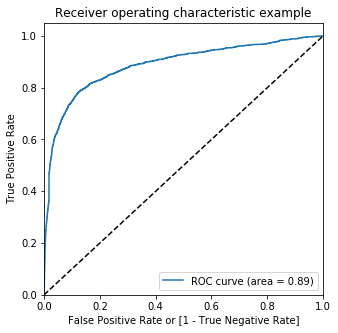

In [118]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### The AUC is pretty high which tells the model is good enough

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.022747          0    1    0    0    0    0    0    0    0    0   
1      0    0.145743          0    1    1    0    0    0    0    0    0    0   
2      0    0.042617          0    1    0    0    0    0    0    0    0    0   
3      0    0.127407          0    1    1    0    0    0    0    0    0    0   
4      0    0.101591          0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.088111  1.000000  0.000000
0.1   0.1  0.817250  0.822607  0.816733
0.2   0.2  0.900882  0.716604  0.918687
0.3   0.3  0.926662  0.621958  0.956104
0.4   0.4  0.936669  0.497566  0.979097
0.5   0.5  0.928520  0.286641  0.990541
0.6   0.6  0.925995  0.204976  0.995663
0.7   0.7  0.916750  0.069767  0.998589
0.8   0.8  0.913224  0.021092  0.999425
0.9   0.9  0.912271  0.005949  0.999843


In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### The Accuracy, specificity and sensitivity trade off says that optimal cuttoff should be 0.1

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.022747          0    1    0    0    0    0    0    0    0    0   
1      0    0.145743          0    1    1    0    0    0    0    0    0    0   
2      0    0.042617          0    1    0    0    0    0    0    0    0    0   
3      0    0.127407          0    1    1    0    0    0    0    0    0    0   
4      0    0.101591          0    1    1    0    0    0    0    0    0    0   

   0.9  final_predicted  
0    0                0  
1    0                1  
2    0                0  
3    0                1  
4    0                1

In [123]:
# Let's check the overall accuracy.
print(round(100*(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)),2))

81.73


In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15629,  3507],
       [  328,  1521]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is: ',round(100*(TP / float(TP+FN)),2))

# Let us calculate specificity
print('Specificity is: ',round(100*(TN / float(TN+FP)),2))

Sensitivity is:  82.26
Specificity is:  81.67


#### Making Prediction on Test Set

In [127]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns
X_test.head()

C:\instlledsftware\anacnda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.869570  0.592505  1.226933     1.988055     2.161328     1.623443   
1 -0.062242 -0.191340  0.045379    -0.233100    -0.360274    -0.275559   
2 -0.739848 -0.633975 -0.918818    -0.599130    -0.507333    -0.531397   
3 -0.844643 -0.474770 -0.401428    -0.633434    -0.639443    -0.581420   
4  0.133697  0.544753  2.080657     0.565826     0.636836     1.816895   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      0.733317      0.818820      0.991604      -0.257738      -0.220395   
1     -0.165163      0.097261      0.448252       0.442550      -0.220395   
2     -0.355249     -0.493336     -0.651136      -0.257738      -0.220395   
3     -0.352717     -0.325927     -0.351610      -0.257738      -0.220395   
4     -0.558582     -0.661655      0.158093       0.842255       1.795048   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.227334      -0.276720      -0.244662      -0.237823   
1      -0.227334       0.185422      -0.244662      -0.237823   
2      -0.227334      -0.276720      -0.244662      -0.237823   
3      -0.227334      -0.276720      -0.244662      -0.237823   
4       7.385408       6.589461       7.886528      12.188740   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          4.981991          5.490553          4.526886          2.194303   
1          0.346115          0.207067          0.329034          0.563005   
2         -0.291175         -0.112566         -0.236509          0.323393   
3         -0.421004         -0.410210         -0.405004          0.220462   
4         -0.435578         -0.436819         -0.445637         -0.759540   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0          2.486173          2.757490         -0.379377         -0.384555   
1          1.193250          1.837908         -0.108524          0.005304   
2          0.051455         -0.413701         -0.379377         -0.384555   
3          0.140725          0.074046         -0.071538          0.587547   
4         -0.790355         -0.770324         -0.379377         -0.384555   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.062857         -0.290183         -0.291450         -0.304758   
1         -0.206788         -0.290183         -0.291450         -0.302917   
2          0.530476         -0.290183         -0.291450         -0.304758   
3          0.370148         -0.290183         -0.291450         -0.277142   
4         -0.386549         -0.290183          0.136461         -0.304758   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      4.408029      4.939120      4.431924         -0.485237   
1      0.568727      0.893501      1.383684         -0.485237   
2      0.015846     -0.058973     -0.387030         -0.483285   
3     -0.114631     -0.134742     -0.172467         -0.449894   
4     -0.781381     -0.801025     -0.787325         -0.485237   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.493223         -0.454345         -0.406144         -0.404061   
1         -0.493223         -0.454345         -0.516115         -0.497959   
2         -0.487029         -0.454345         -0.514421         -0.509030   
3         -0.475740         -0.424595         -0.462772         -0.412310   
4         -0.493223         -0.407781         -0.516115         -0.513385   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.396143         -0.201661         -0.190712          0.180638   
1         -0.478235         -0.201661         -0.190712         -0.193063   
2         -0.478235         -0.201661         -0.190712         -0.193063   
3         -0.407103         -0.201661         -0.190712         -0.193063   
4         -0.476715         -0.201661         -0.190712         -0.193063   



In [128]:
X_test = X_test[col]
X_test.head()

onnet_mou_7  loc_og_t2m_mou_7  loc_og_mou_8  std_og_t2t_mou_8  \
0     2.161328          2.486173      4.431924         -0.454345   
1    -0.360274          1.193250      1.383684         -0.454345   
2    -0.507333          0.051455     -0.387030         -0.454345   
3    -0.639443          0.140725     -0.172467         -0.424595   
4     0.636836         -0.790355     -0.787325         -0.407781   

   std_og_t2m_mou_7  loc_ic_t2m_mou_8  total_ic_mou_7  total_ic_mou_8  \
0         -0.404061          1.430139        1.914681        2.552508   
1         -0.497959          0.612177        0.317951        0.463486   
2         -0.509030          0.959691        1.614238        0.819975   
3         -0.412310         -0.662656       -0.750401       -0.664638   
4         -0.513385         -0.767106       -0.878610       -0.822429   

   spl_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  sep_vbc_3g  
0     -0.259561          0.086910            0.282807    -0.16203  
1     -0.259561         -0.343613            0.393622    -0.16203  
2     -0.259561         -0.666505            0.393622    -0.16203  
3     -0.259561         -0.666505            0.282807    -0.16203  
4     -0.259561          0.302171            0.243230    -0.16203

In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:20]

0     0.000002
1     0.003504
2     0.009531
3     0.075313
4     0.099881
5     0.105002
6     0.123780
7     0.293439
8     0.013154
9     0.029847
10    0.001066
11    0.037575
12    0.000933
13    0.053198
14    0.003833
15    0.003403
16    0.316129
17    0.002443
18    0.009500
19    0.000020
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()

0
0  0.000002
1  0.003504
2  0.009531
3  0.075313
4  0.099881

In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [137]:
y_pred_final.head()

Churner         0
0        0  0.000002
1        0  0.003504
2        0  0.009531
3        0  0.075313
4        0  0.099881

In [138]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [139]:
# Let's see the head of y_pred_final
y_pred_final.head()

Churner  Churn_Prob
0        0    0.000002
1        0    0.003504
2        0    0.009531
3        0    0.075313
4        0    0.099881

In [140]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [141]:
y_pred_final.head()

Churner  Churn_Prob  final_predicted
0        0    0.000002                0
1        0    0.003504                0
2        0    0.009531                0
3        0    0.075313                0
4        0    0.099881                0

In [142]:
# Let's check the overall accuracy.
print(round(100*(metrics.accuracy_score(y_pred_final.Churner, y_pred_final.final_predicted)),2))

81.52


In [143]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churner, y_pred_final.final_predicted )
print(confusion2)

[[6646 1496]
 [ 166  686]]


In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is: ',round(100*(TP / float(TP+FN)),2))

# Let us calculate specificity
print('Specificity is: ',round(100*(TN / float(TN+FP)),2))

Sensitivity is:  80.52
Specificity is:  81.63


## The Sensitivity and Specificity both are pretty high for both train and Test and hence this seems to be a pretty good model

## All the features mentioned below are the best predictor of the Highly Valued Customer (HVC) churner

* total_ic_mou_8
* total_ic_mou_7
* loc_ic_t2m_mou_8
* loc_og_mou_8
* onnet_mou_7
* std_og_t2t_mou_8
* loc_og_t2m_mou_7
* total_rech_num_8
* last_day_rch_amt_8
* std_og_t2m_mou_7
* spl_ic_mou_8
* sep_vbc_3g

<h1><Center>Model 2 Starts from here<h1><Center>

## Modelling using PCA

In [146]:
df_Tel_PCA_LR.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

### Train Test Split

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
# Putting feature variable to X
X = df_Tel_PCA_LR.drop(['Churner','mobile_number'], axis=1)
X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [149]:
# Putting response variable to y
y = df_Tel_PCA_LR['Churner']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churner, dtype: int64

In [150]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [151]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20985, 126)
(8994, 126)
(20985,)
(8994,)


##### Lets run PCA on the data set

Applying PCA transformation on the test set

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [153]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

NameError: name 'PCA' is not defined

In [ ]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)
warnings.filterwarnings('ignore')

In [ ]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

## Lets Draw Scree Plots

In [ ]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.plot(cumulative_variance)
plt.show()

## From above Scree plot, 90% of the variance is defined by 60 components hence taking 60 PCS

## PCA and Logistic Regression

In [ ]:
# create pipeline
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=60)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [ ]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

### Evaluate on test data

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC Score is: \t", round(roc_auc_score(y_test, y_pred_prob),2))

### AUC score seems to be preety high and hence it seems to be a good model, Lets caluclate Sensitivity and Specificity

In [ ]:
# create onfusion matrix
confusion3 = confusion_matrix(y_test, y_pred)
print(confusion3)

In [ ]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is: ',round(100*(TP / float(TP+FN)),2))

# Let us calculate specificity
print('Specificity is: ',round(100*(TN / float(TN+FP)),2))

### Sensitivity and Specifity is very high on test data and hence it seems to be a good model.

<h1><Center>Model 3 Starts from here<h1><Center>

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)



# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC Score is: \t", round(roc_auc_score(y_test, y_pred_prob),2))

### AUC Score seems to be pretty good, Lets calculate the Sensitivity and Specificity

In [ ]:
# create onfusion matrix
confusion4 = confusion_matrix(y_test, y_pred)
print(confusion4)

In [ ]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is: ',round(100*(TP / float(TP+FN)),2))

# Let us calculate specificity
print('Specificity is: ',round(100*(TN / float(TN+FP)),2))

<h1><center>End of the Case Study!</center></h1>

# Best Model Selection

* Logistic Regression without PCA has Secnsitivity and Specificity for both test and train is close to 80%
* Logistic Regression without PCA has AUC Score close to 0.9
* Logistic Regression with PCA has Secnsitivity and Specificity for both test and train is close to 80%
* Logistic Regression without PCA has AUC Score close to 0.9
* Random Forest with GridSearch has very high Specificty but comparatively low Sesnitivity.
* Random Forest has AUC score has close to 0.9.

###### Based on above points, Logistic Regression with or without PCA has all the three parameters very good whereas Random Forest has low sensitivity and hence I would prefer to go with Logistic Regression.

# Recomendations

Below are the top most predictor for the churning of the customer.
* total_ic_mou_8
* total_ic_mou_7
* loc_ic_t2m_mou_8
* loc_og_mou_8
* onnet_mou_7
* std_og_t2t_mou_8
* loc_og_t2m_mou_7
* total_rech_num_8
* last_day_rch_amt_8
* std_og_t2m_mou_7
* spl_ic_mou_8
* sep_vbc_3g

Company needs to very vigilant about the above mentioned parameters.